# Instructions

In this part of the project you develop models to forecast the next 3 years of U.S. Gross Domestic Product (GDP), in millions of dollars.  The data are quarterly and come from the [FRED](https://fred.stlouisfed.org/series/NA000334Q).  For each of the methods you use you should:

1. Fully justify the final model choice for each method
2. Demonstrate whether the selected model fully incorporates all the available information in the time series




In [ ]:
install.packages('fpp2')
library(fpp2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching packages ────────────────────────────────────────────── fpp2 2.5 ──

✔ ggplot2   3.4.2     ✔ fma       2.5  
✔ forecast  8.21      ✔ expsmooth 2.3  





In [ ]:
#Code for widening time series plots:
library(repr)
options(repr.plot.width=10, repr.plot.height=5)

In [ ]:
gdp <- read.csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=NA000334Q&scale=left&cosd=1990-01-01&coed=2022-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-21&revision_date=2023-04-21&nd=1947-01-01')
gdp_ts <- ts(gdp[,2], start = c(1990, 1), frequency = 4)

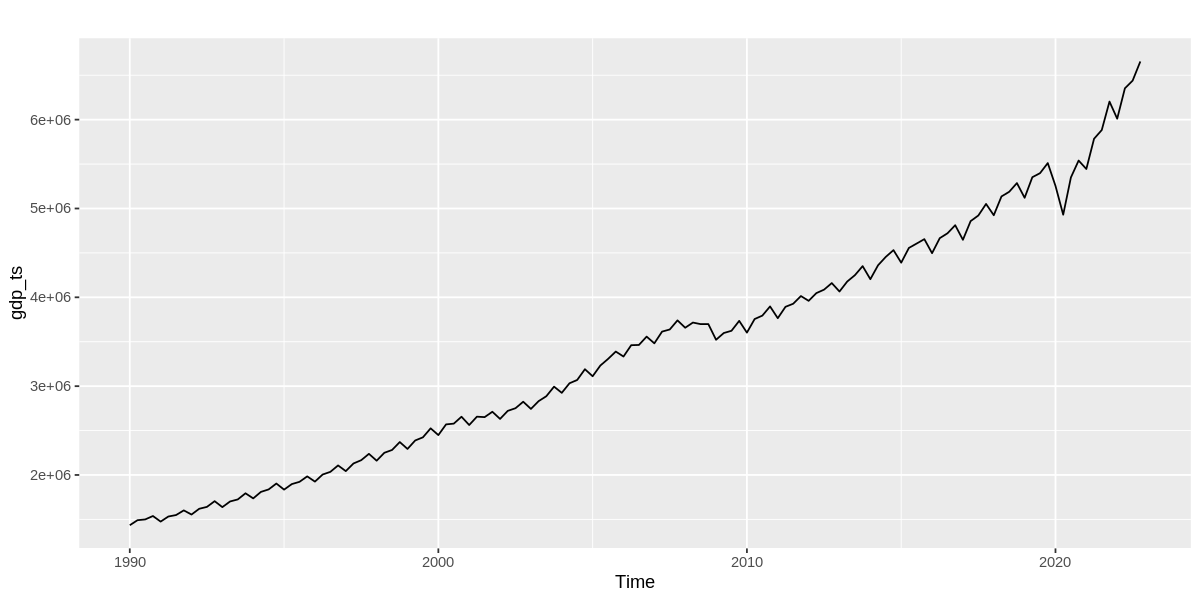

In [ ]:
autoplot(gdp_ts)

# 1) 

Fully describe this time series.

***The time series looks to have pretty linear trend throughout. At 2020 however, there is a significantly noticable dip, but once it recovers it has steeper linear growth. There is also seasonanality present, however the differences between the peaks and valleys are small.***

# 2) Decomposition

Use a decomposition to summarize the behavior of the various components of this time series.  You can choose the decomposition method but you should check that whatever method you choose performs well.

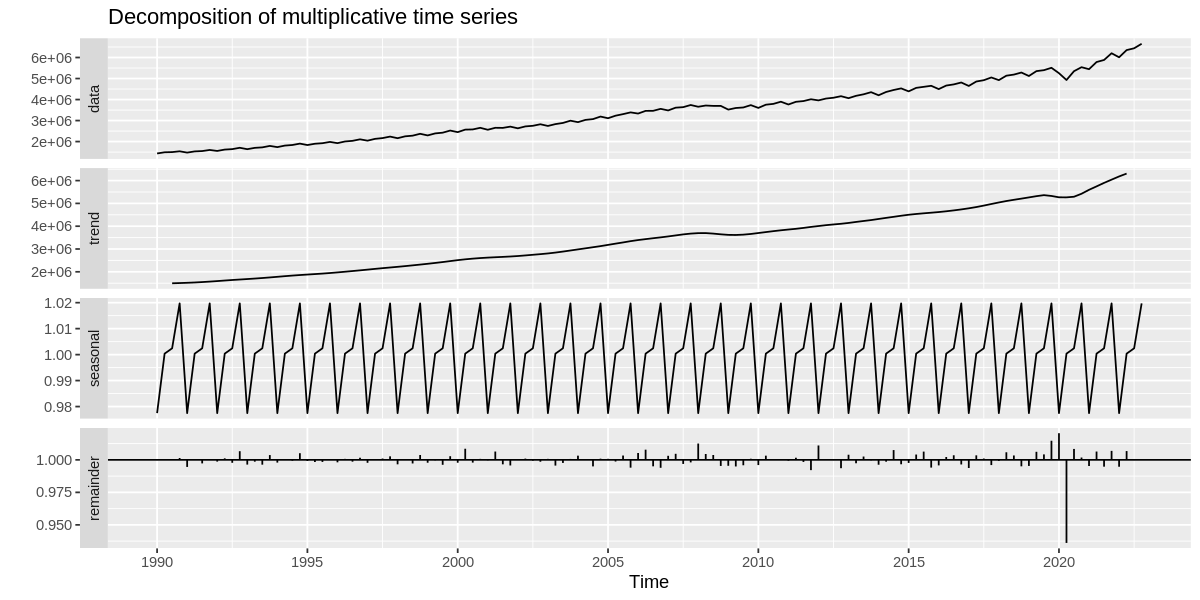

In [ ]:
gdp_decomposition <- decompose(gdp_ts, type = 'multiplicative')
autoplot(gdp_decomposition)

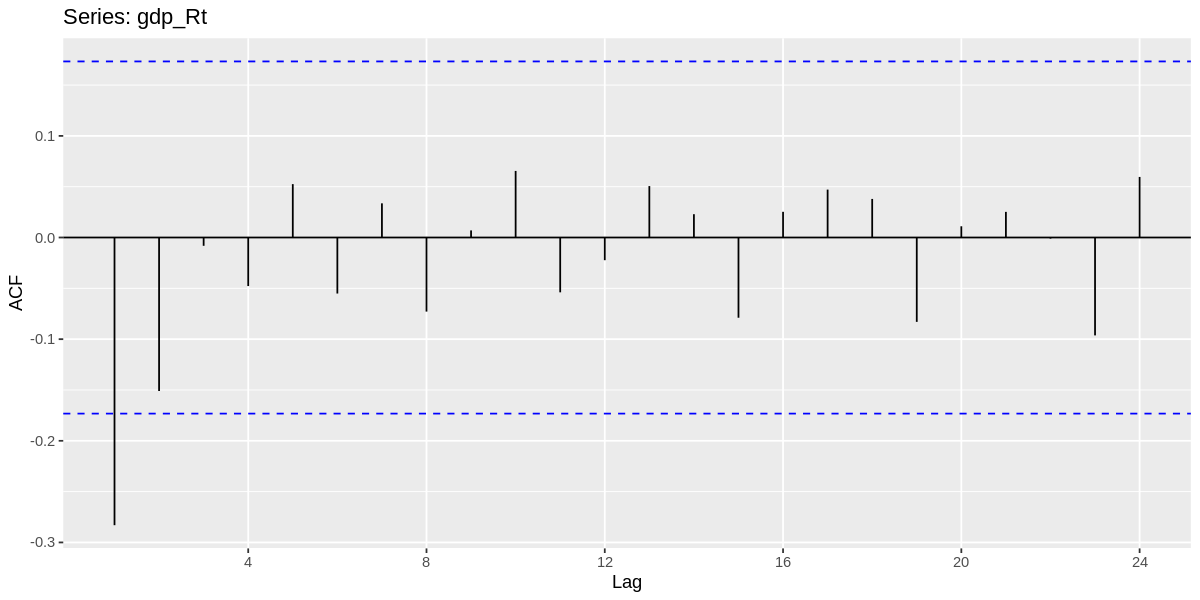

In [ ]:
gdp_Rt <- remainder(gdp_decomposition)
ggAcf(gdp_Rt, lag.max = 24)

***I picked multiplicative decomposition and as we can see in the ggAcf plot, there is only 1 needle outside the band. This means it should do a sufficent job for forecasting this time series.***

# 3) Linear regression

Select a forecast method using linear regression methods.  Fully demonstrate/explain your model selection process.

In [ ]:
gdp_linear <- tslm(gdp_ts ~ season + trend)
gdp_2nd_poly <- tslm(gdp_ts~season + poly(trend,2))
gdp_3rd_poly <- tslm(gdp_ts~season + poly(trend,3))
gdp_4th_poly <- tslm(gdp_ts~season + poly(trend,4))
gdp_spline <- splinef(gdp_ts)
gdp_fourierfit.k1 <- tslm(gdp_ts~fourier(gdp_ts, K = 1))
gdp_fourierfit.k2 <- tslm(gdp_ts~fourier(gdp_ts, K = 2))


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 112.43, df = 8, p-value < 2.2e-16


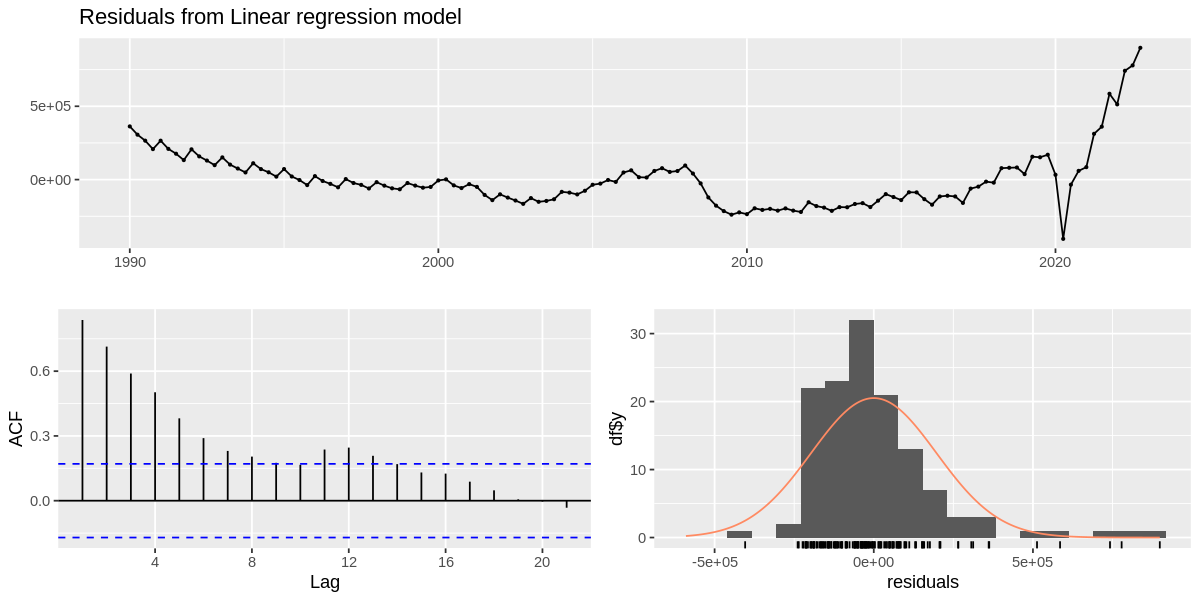


	Breusch-Godfrey test for serial correlation of order up to 9

data:  Residuals from Linear regression model
LM test = 100.26, df = 9, p-value < 2.2e-16


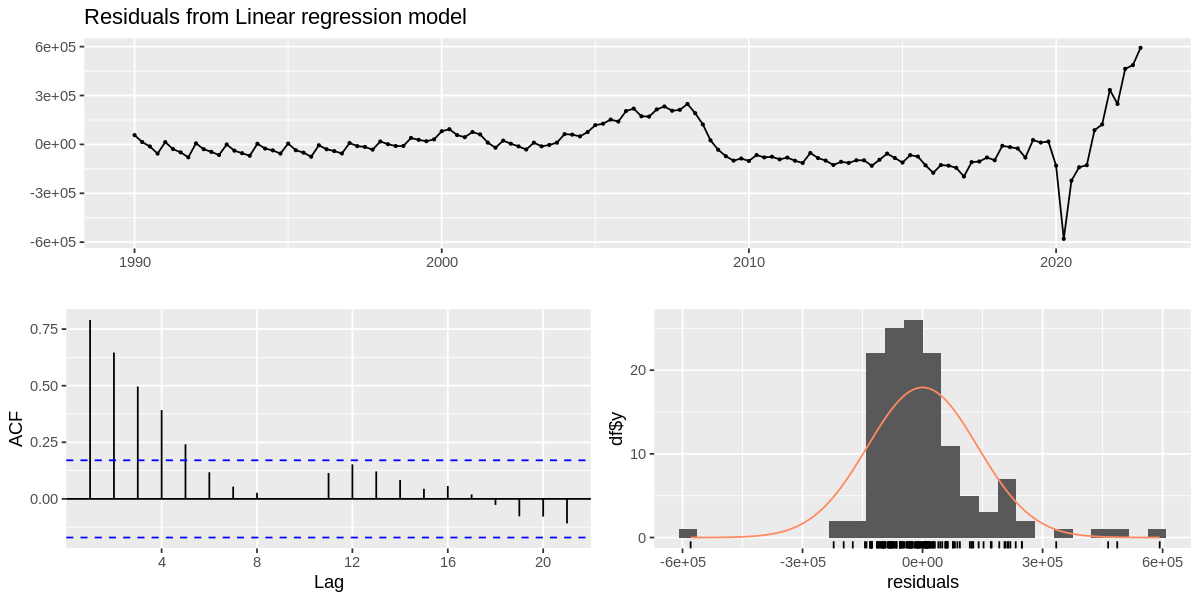


	Breusch-Godfrey test for serial correlation of order up to 10

data:  Residuals from Linear regression model
LM test = 92.449, df = 10, p-value = 1.748e-15


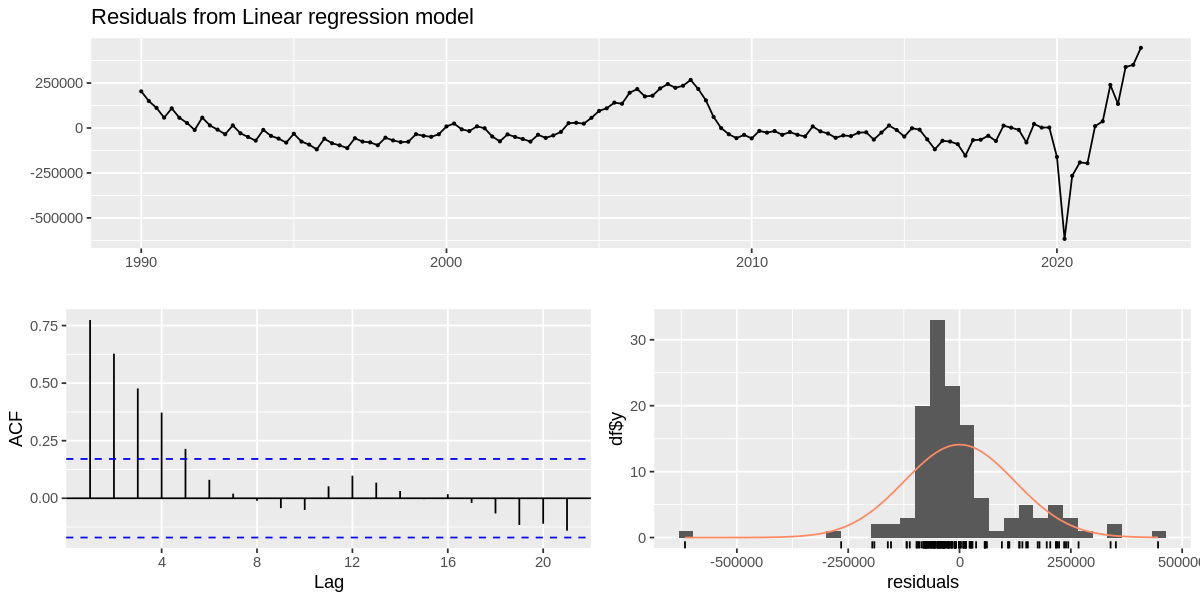


	Breusch-Godfrey test for serial correlation of order up to 11

data:  Residuals from Linear regression model
LM test = 76.038, df = 11, p-value = 8.565e-12


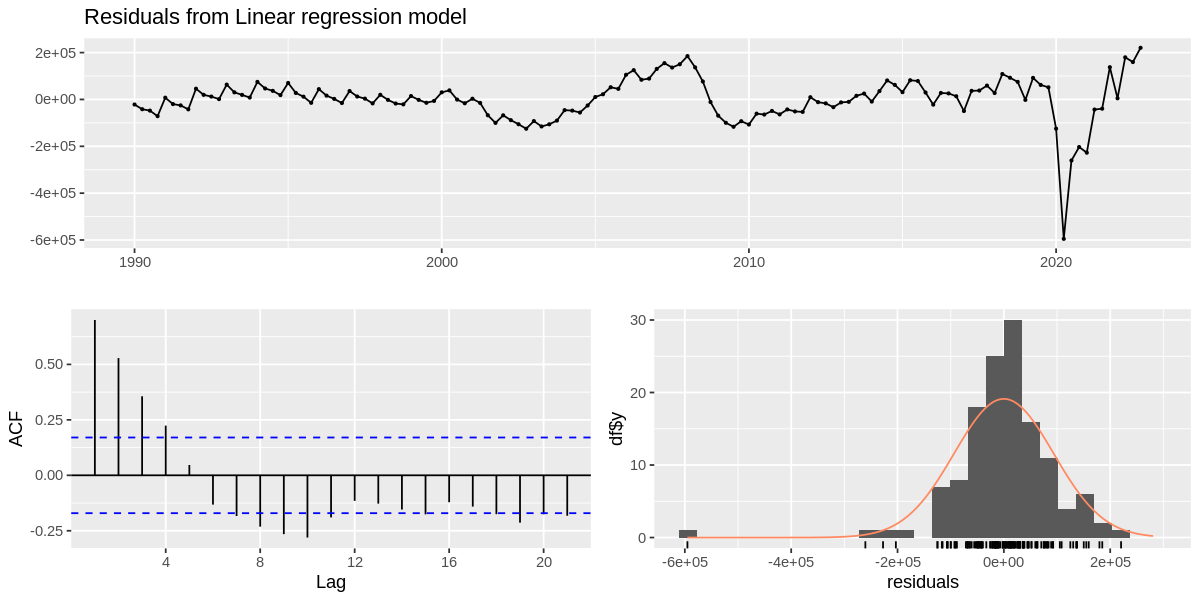


	Ljung-Box test

data:  Residuals from Cubic Smoothing Spline
Q* = 71.327, df = 8, p-value = 2.674e-12

Model df: 0.   Total lags used: 8



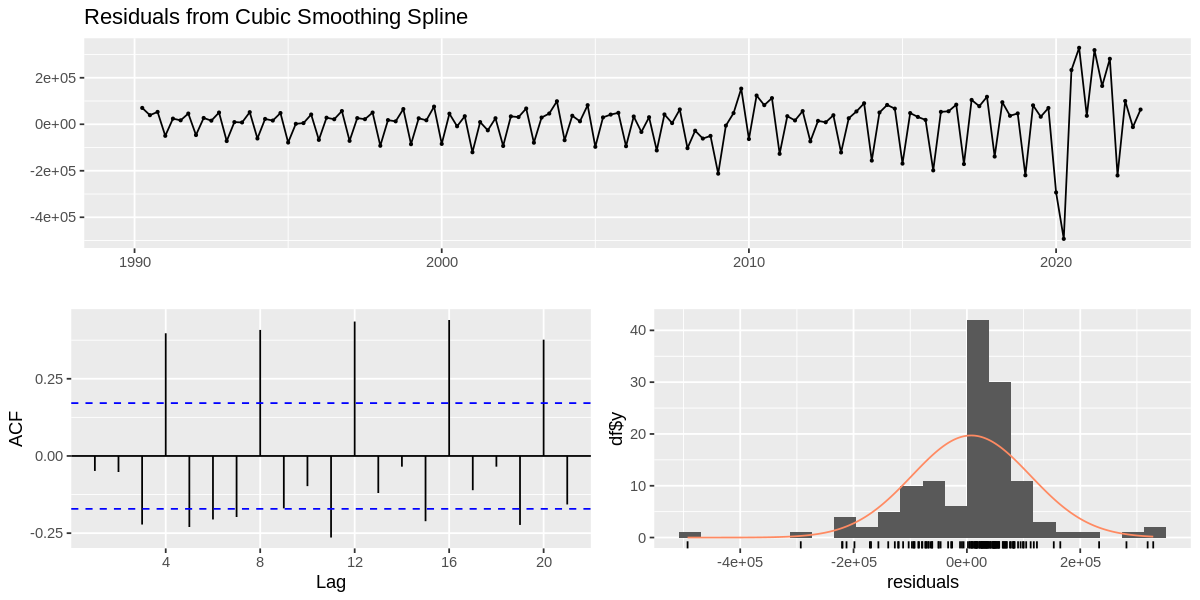


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 129.22, df = 8, p-value < 2.2e-16


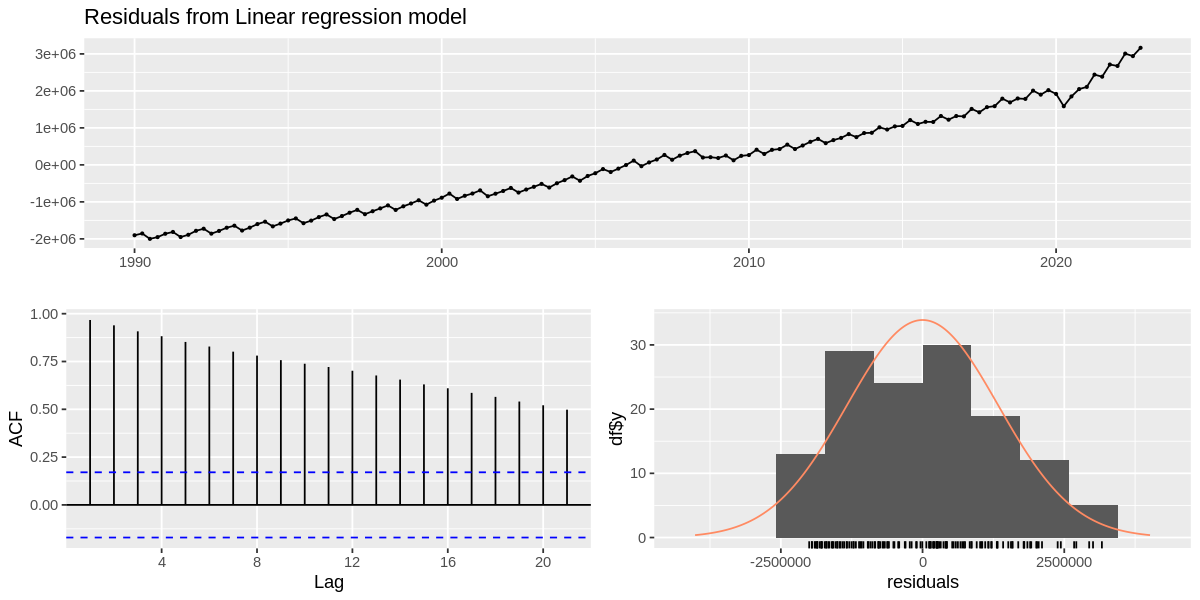


	Breusch-Godfrey test for serial correlation of order up to 8

data:  Residuals from Linear regression model
LM test = 129.43, df = 8, p-value < 2.2e-16


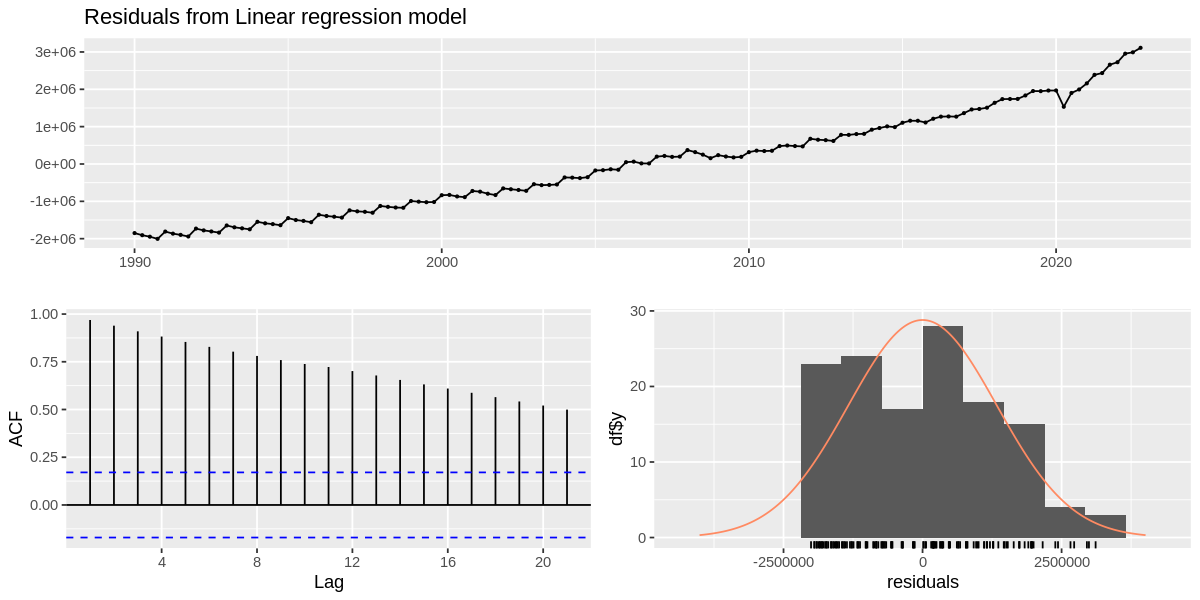

In [ ]:
checkresiduals(gdp_linear)
checkresiduals(gdp_2nd_poly)
checkresiduals(gdp_3rd_poly)
checkresiduals(gdp_4th_poly)
checkresiduals(gdp_spline)
checkresiduals(gdp_fourierfit.k1)
checkresiduals(gdp_fourierfit.k2)

***For my model selection process, I created a bunch of different linear regression models that include different polynomials used, always including seasonality as a factor since we are working with data that has seasonality. I also created some fourier series to see how it would work with our time series. After that I checked the residuals and found that the 4th degree polynomial performed the best, while it is nowhere near perfect, it had the least amount of needles outside the bands.***

# 4) Exponential smoothing

Select an exponential smoothing forecast method.  Fully demonstrate/explain your model selection process and clearly state the final model chosen. Also, interpret the model smoothing parameters and initial states to the best of your ability. Is your final model any of the "named" exponential smoothing methods?

In [ ]:
gdp_ses <- ses(gdp_ts, h = 12)
gdp_holt <- holt(gdp_ts, h = 12)
gdp_hw_additive <- hw(gdp_ts, seasonal = 'additive', h = 12)
gdp_hw_multiplicative <- hw(gdp_ts, seasonal = 'multiplicative', h = 12)


	Ljung-Box test

data:  Residuals from Simple exponential smoothing
Q* = 105.29, df = 8, p-value < 2.2e-16

Model df: 0.   Total lags used: 8



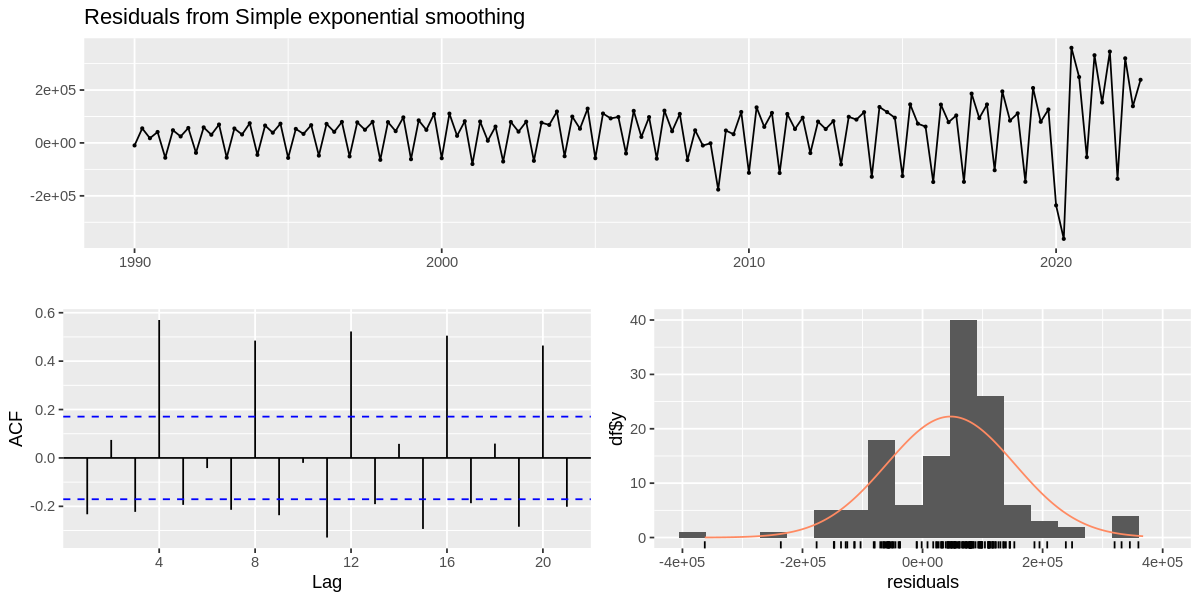


	Ljung-Box test

data:  Residuals from Holt's method
Q* = 69.323, df = 8, p-value = 6.702e-12

Model df: 0.   Total lags used: 8



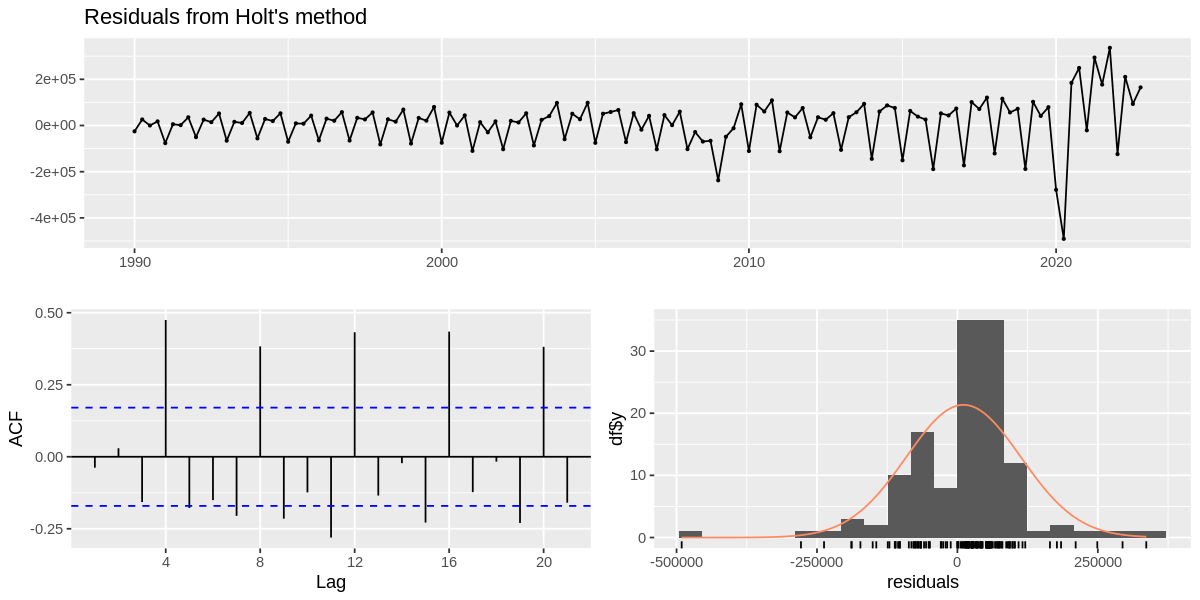


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 6.6033, df = 8, p-value = 0.58

Model df: 0.   Total lags used: 8



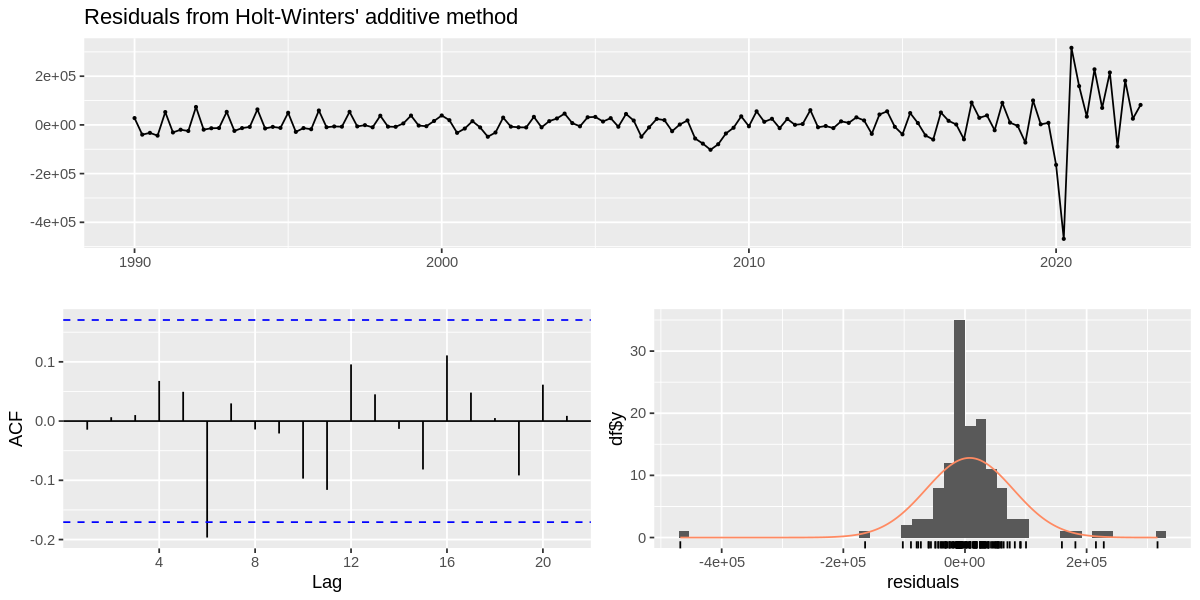


	Ljung-Box test

data:  Residuals from Holt-Winters' multiplicative method
Q* = 4.6728, df = 8, p-value = 0.7919

Model df: 0.   Total lags used: 8



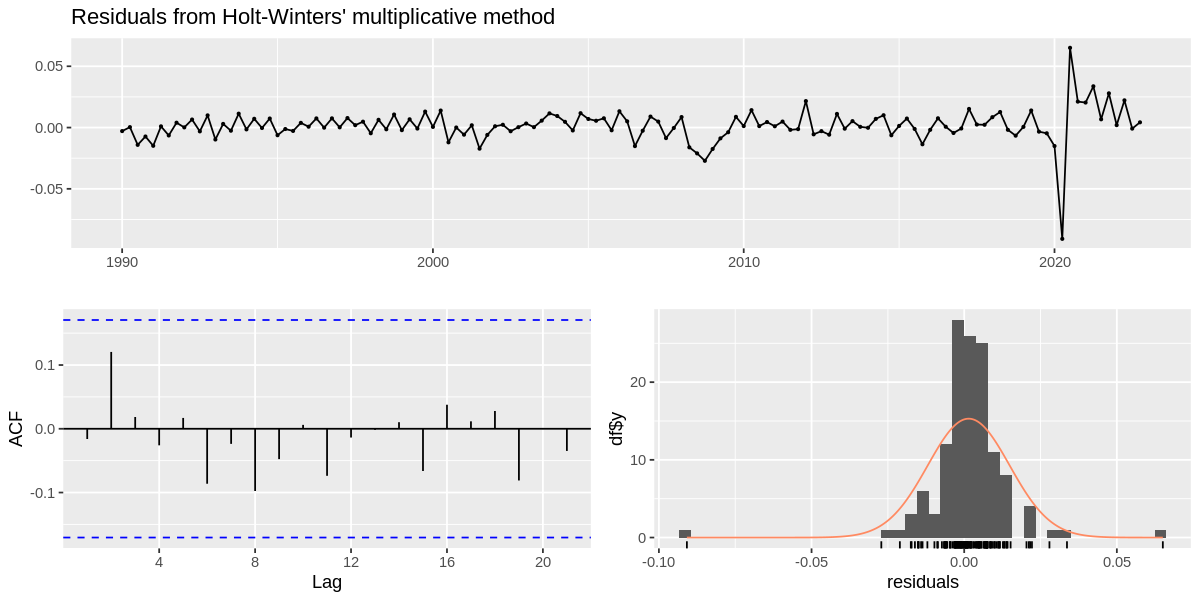

In [ ]:
checkresiduals(gdp_ses)
checkresiduals(gdp_holt)
checkresiduals(gdp_hw_additive)
checkresiduals(gdp_hw_multiplicative)

***For this I created plots for 4 of the exponential smoothing methods. I then checked the residuals to look at the ACF plots associated with them. Holt-Winters Multiplicative method was selected because it had 0 needles outside of the bands where all of the others did. It also has a very high P-Value. This makes sense because the GDP timeseries has clear trend and seasonality, and the magnitude of the seasonality fluctuates over time, because of this, the Holt-Winters multiplicative method would be selected.***

# 5)  ARIMA

Select an ARIMA model.   Fully demonstrate/explain your model selection process and clearly state the final model chosen.

In [ ]:
nsdiffs(gdp_ts)

[1] 1

In [ ]:
ndiffs(diff(gdp_ts, lag=4))

[1] 1

In [ ]:
ndiffs(diff(diff(gdp_ts, lag=4)))

[1] 0

***This suggests 1 level of normal differencing and one level of seasonal differencing.***

In [ ]:
gdp_diff2 <- diff(diff(gdp_ts, lag=4))

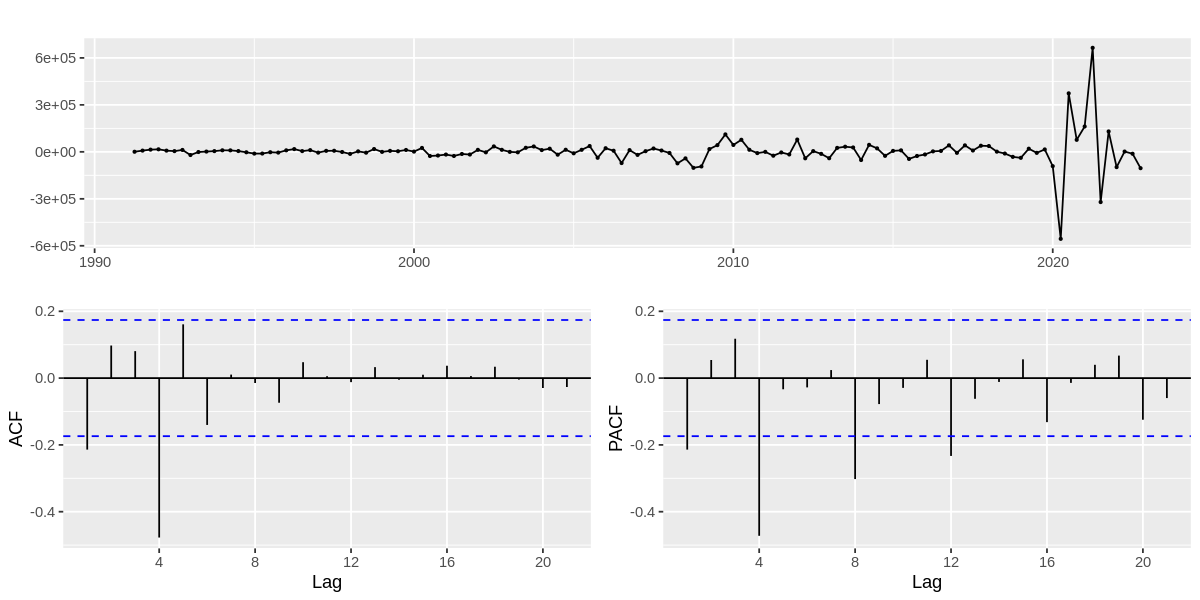

In [ ]:
ggtsdisplay(gdp_diff2)

***In the ACF plot ARIMA(0, 1, 1)(0, 1, 1)***

***In the PACF plot ARIMA (1, 1, 0)(3, 1, 0)***

In [ ]:
#Variants On (0,1,1)(0,1,1)
ARIMA_mod1 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(0,1,1))
ARIMA_mod2 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(0,1,2))
ARIMA_mod3 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(1,1,1))
ARIMA_mod4 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(1,1,2))
ARIMA_mod5 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(0,1,0))

ARIMA_mod6 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(0,1,1))
ARIMA_mod7 <- Arima(gdp_ts, order = c(0,1,2), seasonal = c(0,1,2))
ARIMA_mod8 <- Arima(gdp_ts, order = c(1,1,1), seasonal = c(1,1,1))
ARIMA_mod9 <- Arima(gdp_ts, order = c(0,1,0), seasonal = c(1,1,2))

ARIMA_mod10 <- Arima(gdp_ts, order = c(0,1,1), seasonal = c(0,1,1))
ARIMA_mod11 <- Arima(gdp_ts, order = c(0,1,2), seasonal = c(0,1,1))
ARIMA_mod12 <- Arima(gdp_ts, order = c(1,1,1), seasonal = c(0,1,1))
ARIMA_mod13 <- Arima(gdp_ts, order = c(0,1,2), seasonal = c(0,1,1))

#Variants on (1,1,0)(3,1,0)
ARIMA_mod14 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(3,1,0))
ARIMA_mod15 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(2,1,0))
ARIMA_mod15 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(2,1,1))
ARIMA_mod16 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(1,1,1))
ARIMA_mod17 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(3,1,1))

ARIMA_mod18 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(3,1,0))
ARIMA_mod19 <- Arima(gdp_ts, order = c(1,1,1), seasonal = c(2,1,0))
ARIMA_mod20 <- Arima(gdp_ts, order = c(0,1,0), seasonal = c(2,1,1))
ARIMA_mod21 <- Arima(gdp_ts, order = c(2,1,0), seasonal = c(1,1,1))
ARIMA_mod22 <- Arima(gdp_ts, order = c(2,1,1), seasonal = c(3,1,1))

ARIMA_mod23 <- Arima(gdp_ts, order = c(1,1,0), seasonal = c(3,1,0))
ARIMA_mod24 <- Arima(gdp_ts, order = c(1,1,1), seasonal = c(3,1,0))
ARIMA_mod25 <- Arima(gdp_ts, order = c(0,1,0), seasonal = c(3,1,0))
ARIMA_mod26 <- Arima(gdp_ts, order = c(2,1,0), seasonal = c(3,1,0))
ARIMA_mod27 <- Arima(gdp_ts, order = c(2,1,1), seasonal = c(3,1,0))


In [ ]:
ARIMA_mod1$aicc
ARIMA_mod2$aicc
ARIMA_mod3$aicc
ARIMA_mod4$aicc
ARIMA_mod5$aicc
ARIMA_mod6$aicc
ARIMA_mod7$aicc
ARIMA_mod8$aicc
ARIMA_mod9$aicc
ARIMA_mod10$aicc
ARIMA_mod11$aicc
ARIMA_mod12$aicc
ARIMA_mod13$aicc
ARIMA_mod14$aicc
ARIMA_mod15$aicc
ARIMA_mod16$aicc
ARIMA_mod17$aicc
ARIMA_mod18$aicc
ARIMA_mod19$aicc
ARIMA_mod20$aicc
ARIMA_mod21$aicc
ARIMA_mod22$aicc
ARIMA_mod23$aicc
ARIMA_mod24$aicc
ARIMA_mod25$aicc
ARIMA_mod26$aicc
ARIMA_mod27$aicc

[1] 3212.349

[1] 3213.858

[1] 3214.156

[1] 3208.412

[1] 3273.584

[1] 3212.349

[1] 3213.642

[1] 3215.246

[1] 3207.476

[1] 3212.349

[1] 3211.913

[1] 3213.413

[1] 3211.913

[1] 3210.602

[1] 3208.808

[1] 3213.652

[1] 3210.628

[1] 3210.602

[1] 3217.603

[1] 3208.498

[1] 3214.379

[1] 3213.592

[1] 3210.602

[1] 3212.576

[1] 3210.972

[1] 3212.199

[1] 3213.586

In [ ]:
ARIMA_mod9$aicc

[1] 3207.476

***After calculating the difference, we get 1 seasonal differencing and one normal differencing. Then after looking the ACF and PACF plots, we get (0,1,1)(0,1,1) and (1,1,0)(3,1,0). After creating variations of those and checking the AICc values. Model 9, or this variation (0,1,0)(1,1,2) scored the lowest with a 3207.48 AICc***



# 6) 

You now have 4 models: your decomposition; linear regression; exponential smoothing; and ARIMA models.  Create 4 forecasts (one from each model) to forecast the quarterly GDP for the next 3 years.  Comment on which methods (if any) seem reasonable.

In [ ]:
gdp_4th_poly_forecast <- forecast(gdp_4th_poly, h = 12)
gdp_hw_multiplicative_forecast <- forecast(gdp_hw_multiplicative, h = 12)
ARIMA_mod9_forecast <- forecast(ARIMA_mod9, h = 12)



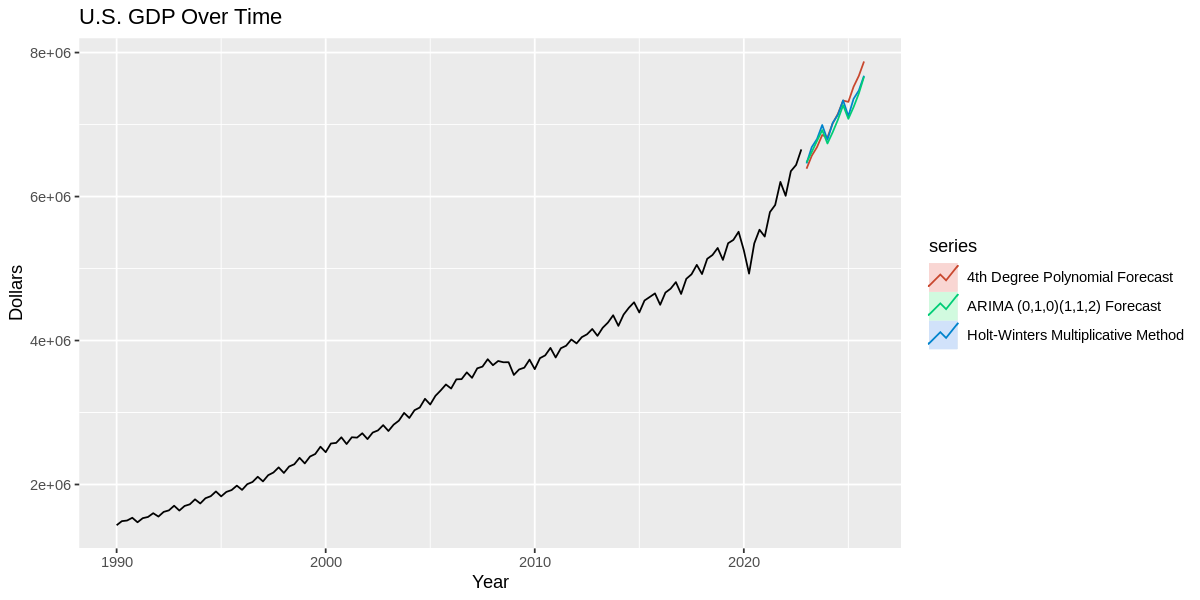

In [ ]:
autoplot(gdp_ts) + ylab('Dollars') + xlab('Year') + ggtitle('U.S. GDP Over Time') +
  autolayer(gdp_4th_poly_forecast, PI = FALSE, series = '4th Degree Polynomial Forecast') +
    autolayer(gdp_hw_multiplicative_forecast, PI = FALSE, series = 'Holt-Winters Multiplicative Method') +
    autolayer(ARIMA_mod9_forecast, PI = FALSE, series = 'ARIMA (0,1,0)(1,1,2) Forecast') 

***The ARIMA Model and Holt-Winters multiplicative have very similar trend but do a better job than the 4th degree polynomial because it does a better job at predicting seasonality. With this graph, however, it is hard to distinguish a clear favorite.***

# 7) 

Which of your 4 models most accurately forecasts a test set consisting of the most recent 3 years of GDP measurements?

In [ ]:
gdp

DATE,NA000334Q
<chr>,<dbl>
1990-01-01,1434375
1990-04-01,1490965
1990-07-01,1499694
1990-10-01,1538100
1991-01-01,1475270
1991-04-01,1532427
1991-07-01,1548990
1991-10-01,1601443
1992-01-01,1554707


In [ ]:
gdp_train <- window(gdp_ts, end = c(2020))
gdp_test <- window(gdp_ts, start = c(2020))

In [ ]:
length(gdp_test)

[1] 12

In [ ]:
gdp_4th_poly_train <- tslm(gdp_train~season + poly(trend,4))
gdp_hw_multiplicative_train <- hw(gdp_train, seasonal = 'multiplicative', h = 12)
ARIMA_mod9_train <- Arima(gdp_train, order = c(0,1,0), seasonal = c(1,1,2))

In [ ]:
gdp_4th_poly_train_forecast <- forecast(gdp_4th_poly_train, h = 12)
gdp_hw_multiplicative_train_forecast <- forecast(gdp_hw_multiplicative_train, h = 12)
ARIMA_mod9_train_forecast <- forecast(ARIMA_mod9_train, h = 12)

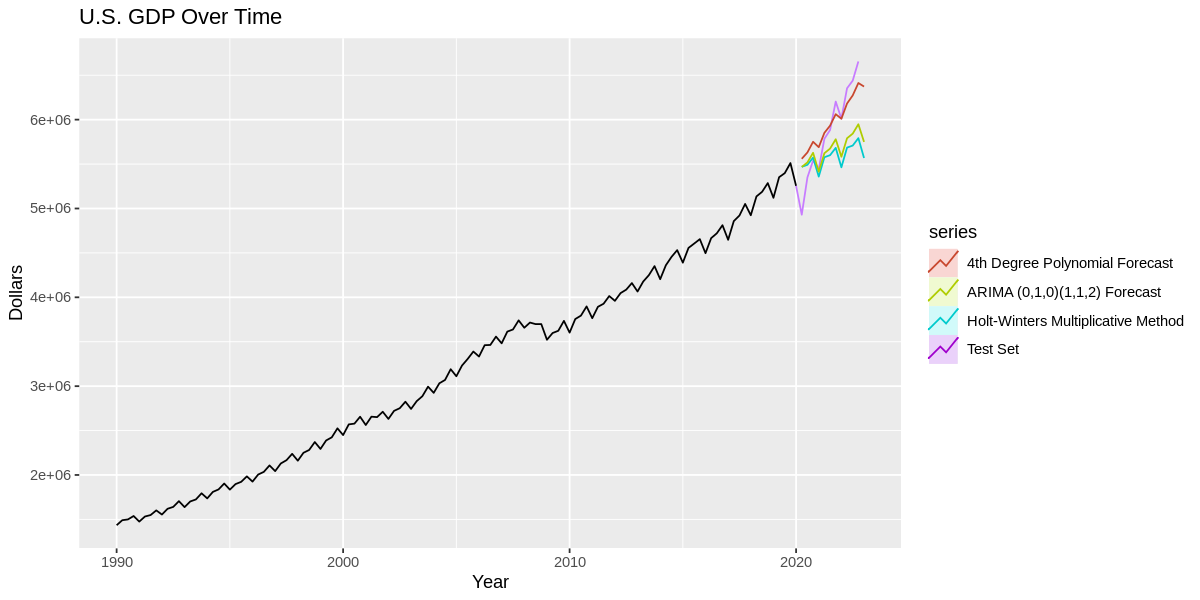

In [ ]:
autoplot(gdp_train) + ylab('Dollars') + xlab('Year') + ggtitle('U.S. GDP Over Time') +
  autolayer(gdp_test, series = 'Test Set') +
  autolayer(gdp_4th_poly_train_forecast, PI = FALSE, series = '4th Degree Polynomial Forecast') +
  autolayer(gdp_hw_multiplicative_train_forecast, PI = FALSE, series = 'Holt-Winters Multiplicative Method') +
  autolayer(ARIMA_mod7_train_forecast, PI = FALSE, series = 'ARIMA (0,1,0)(1,1,2) Forecast')


***After looking at the graph, the 4th degree polynomial looks the best because it is the only one that is matching its trend.***

In [ ]:
rbind(accuracy(gdp_4th_poly_train_forecast, gdp_test) [2,c(2,3,5,6)],
accuracy(gdp_hw_multiplicative_train_forecast, gdp_test) [2,c(2,3,5,6)],
accuracy(ARIMA_mod9_train_forecast, gdp_test) [2,c(2,3,5,6)])

RMSE,MAE,MAPE,MASE
256351.2,200530.7,3.595823,1.440075
498975.3,420124.3,6.955145,3.017047
419118.4,355881.3,5.933614,2.555698


***Based on the test set, 4th degree polynomial does the best job at forecasting. This is because it has the lowest RMSE, MAE, MAPE, MASE.*** 